In [5]:
#import anai
#from anai.preprocessing import Preprocessor

In [78]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [79]:
pwd

'c:\\Users\\pawas\\Documents\\kaggle\\Azure-Mantainance\\code'

In [80]:
# Load data
telemetry = pd.read_csv('../archive/PdM_telemetry.csv')
errors = pd.read_csv('../archive/PdM_errors.csv')
maint = pd.read_csv('../archive/PdM_maint.csv')
failures = pd.read_csv('../archive/PdM_failures.csv')
machines = pd.read_csv('../archive/PdM_machines.csv')

In [81]:
display(telemetry)

datetime  machineID        volt      rotate    pressure  \
0       2015-01-01 06:00:00          1  176.217853  418.504078  113.077935   
1       2015-01-01 07:00:00          1  162.879223  402.747490   95.460525   
2       2015-01-01 08:00:00          1  170.989902  527.349825   75.237905   
3       2015-01-01 09:00:00          1  162.462833  346.149335  109.248561   
4       2015-01-01 10:00:00          1  157.610021  435.376873  111.886648   
...                     ...        ...         ...         ...         ...   
876095  2016-01-01 02:00:00        100  179.438162  395.222827  102.290715   
876096  2016-01-01 03:00:00        100  189.617555  446.207972   98.180607   
876097  2016-01-01 04:00:00        100  192.483414  447.816524   94.132837   
876098  2016-01-01 05:00:00        100  165.475310  413.771670  104.081073   
876099  2016-01-01 06:00:00        100  171.336037  496.096870   79.095538   

        vibration  
0       45.087686  
1       43.413973  
2       34.178847  
3       41.122144  
4       25.990511  
...           ...  
876095  50.771941  
876096  35.123072  
876097  48.314561  
876098  44.835259  
876099  37.845245  

[876100 rows x 6 columns]

In [82]:
display(errors)

datetime  machineID errorID
0     2015-01-03 07:00:00          1  error1
1     2015-01-03 20:00:00          1  error3
2     2015-01-04 06:00:00          1  error5
3     2015-01-10 15:00:00          1  error4
4     2015-01-22 10:00:00          1  error4
...                   ...        ...     ...
3914  2015-11-21 08:00:00        100  error2
3915  2015-12-04 02:00:00        100  error1
3916  2015-12-08 06:00:00        100  error2
3917  2015-12-08 06:00:00        100  error3
3918  2015-12-22 03:00:00        100  error3

[3919 rows x 3 columns]

In [83]:
display(maint)

datetime  machineID   comp
0     2014-06-01 06:00:00          1  comp2
1     2014-07-16 06:00:00          1  comp4
2     2014-07-31 06:00:00          1  comp3
3     2014-12-13 06:00:00          1  comp1
4     2015-01-05 06:00:00          1  comp4
...                   ...        ...    ...
3281  2015-10-10 06:00:00        100  comp3
3282  2015-10-25 06:00:00        100  comp4
3283  2015-11-09 06:00:00        100  comp4
3284  2015-12-09 06:00:00        100  comp2
3285  2015-12-24 06:00:00        100  comp2

[3286 rows x 3 columns]

In [84]:
display(failures)

datetime  machineID failure
0    2015-01-05 06:00:00          1   comp4
1    2015-03-06 06:00:00          1   comp1
2    2015-04-20 06:00:00          1   comp2
3    2015-06-19 06:00:00          1   comp4
4    2015-09-02 06:00:00          1   comp4
..                   ...        ...     ...
756  2015-11-29 06:00:00         99   comp3
757  2015-12-14 06:00:00         99   comp4
758  2015-02-12 06:00:00        100   comp1
759  2015-09-10 06:00:00        100   comp1
760  2015-12-09 06:00:00        100   comp2

[761 rows x 3 columns]

In [85]:
display(machines)

machineID   model  age
0           1  model3   18
1           2  model4    7
2           3  model3    8
3           4  model3    7
4           5  model3    2
..        ...     ...  ...
95         96  model2   10
96         97  model2   14
97         98  model2   20
98         99  model1   14
99        100  model4    5

[100 rows x 3 columns]

# EDA Telemetry Data

In [86]:
telemetry['datetime'] = pd.to_datetime(telemetry['datetime'], format="%Y-%m-%d %H:%M:%S")

print("Total number of telemetry records: %d" % len(telemetry.index))

telemetry.describe()


Total number of telemetry records: 876100


datetime      machineID           volt         rotate  \
count               876100  876100.000000  876100.000000  876100.000000   
mean   2015-07-02 18:00:00      50.500000     170.777736     446.605119   
min    2015-01-01 06:00:00       1.000000      97.333604     138.432075   
25%    2015-04-02 12:00:00      25.750000     160.304927     412.305714   
50%    2015-07-02 18:00:00      50.500000     170.607338     447.558150   
75%    2015-10-02 00:00:00      75.250000     181.004493     482.176600   
max    2016-01-01 06:00:00     100.000000     255.124717     695.020984   
std                    NaN      28.866087      15.509114      52.673886   

            pressure      vibration  
count  876100.000000  876100.000000  
mean      100.858668      40.385007  
min        51.237106      14.877054  
25%        93.498181      36.777299  
50%       100.425559      40.237247  
75%       107.555231      43.784938  
max       185.951998      76.791072  
std        11.048679       5.370361

In [87]:
plot_df = telemetry.loc[(telemetry['machineID'] == 1) &
                        (telemetry['datetime'] > pd.to_datetime('2015-01-01')) &
                        (telemetry['datetime'] < pd.to_datetime('2015-02-01'))]


In [88]:
fig = px.line(x=plot_df['datetime'].values, y=plot_df['volt'].values, title='Voltage over time')
fig.update_layout(xaxis_title='Time', yaxis_title='Voltage')
fig.show()

c:\Users\pawas\.conda\envs\pyenv\Lib\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [89]:
# Create subplots with four line charts
fig = make_subplots(rows=4, cols=1, subplot_titles=('Volt', 'Rotate', 'Pressure', 'Vibration'), shared_xaxes=True)

# Add line charts to subplots
fig.add_trace(go.Scatter(x=plot_df['datetime'], y=plot_df['volt'], mode='lines', name='Volt'), row=1, col=1)
fig.add_trace(go.Scatter(x=plot_df['datetime'], y=plot_df['rotate'], mode='lines', name='Rotate'), row=2, col=1)
fig.add_trace(go.Scatter(x=plot_df['datetime'], y=plot_df['pressure'], mode='lines', name='Pressure'), row=3, col=1)
fig.add_trace(go.Scatter(x=plot_df['datetime'], y=plot_df['vibration'], mode='lines', name='Vibration'), row=4, col=1)

# Update layout
fig.update_layout(title_text='Telemetry Data Over Time', showlegend=False, height=800, width=1000)

# Show the figure
fig.show()


c:\Users\pawas\.conda\envs\pyenv\Lib\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



# EDA Errors Data

In [90]:
errors['datetime'] = pd.to_datetime(errors['datetime'], format="%Y-%m-%d %H:%M:%S")
errors['errorID'] = errors['errorID'].astype('object')

print("Total number of error records: %d" % len(errors.index))
errors.head()

Total number of error records: 3919


datetime  machineID errorID
0 2015-01-03 07:00:00          1  error1
1 2015-01-03 20:00:00          1  error3
2 2015-01-04 06:00:00          1  error5
3 2015-01-10 15:00:00          1  error4
4 2015-01-22 10:00:00          1  error4

In [91]:

fig = px.bar(x=errors['errorID'].values, title='Count of Errors', color=errors['errorID'].values)
fig.update_layout(xaxis_title='Error Type', yaxis_title='Count')
fig.show()


# EDA Maintainance Data

In [92]:
maint['datetime'] = pd.to_datetime(maint['datetime'], format="%Y-%m-%d %H:%M:%S")
maint['comp'] = maint['comp'].astype('object')

print("Total number of maintenance records: %d" % len(maint.index))
maint.head()


Total number of maintenance records: 3286


datetime  machineID   comp
0 2014-06-01 06:00:00          1  comp2
1 2014-07-16 06:00:00          1  comp4
2 2014-07-31 06:00:00          1  comp3
3 2014-12-13 06:00:00          1  comp1
4 2015-01-05 06:00:00          1  comp4

In [93]:
fig = px.bar(x=maint['comp'].values, title='Count of Comp', color=maint['comp'].values)
fig.update_layout(xaxis_title='Comp Type', yaxis_title='Count')
fig.show()


# EDA Machine Data

In [94]:
machines['model'] = machines['model'].astype('object')

print("Total number of machines: %d" % len(machines.index))
machines.head()


Total number of machines: 100


machineID   model  age
0          1  model3   18
1          2  model4    7
2          3  model3    8
3          4  model3    7
4          5  model3    2

In [95]:
px.histogram(machines, x='age', color='model', facet_col='model', title='Machine Age Distribution', width=1200, height=400)


In [96]:
fig = go.Figure()
for model, gd in machines.groupby('model'):
    fig.add_trace(go.Histogram(x=gd['age'], name=model, nbinsx=20))
    
fig.update_layout(
    title_text='Histogram by Model',
    xaxis_title_text='Age',
    yaxis_title_text='Frequency',
    barmode='stack'  # or 'stack' for stacked bars
)

fig.show()

# EDA Failure Data

In [97]:
failures['datetime'] = pd.to_datetime(failures['datetime'], format="%Y-%m-%d %H:%M:%S")
failures['failure'] = failures['failure'].astype('object')

print("Total number of failures: %d" % len(failures.index))
failures.head()


Total number of failures: 761


datetime  machineID failure
0 2015-01-05 06:00:00          1   comp4
1 2015-03-06 06:00:00          1   comp1
2 2015-04-20 06:00:00          1   comp2
3 2015-06-19 06:00:00          1   comp4
4 2015-09-02 06:00:00          1   comp4

In [98]:
fig = px.bar(x=failures['failure'].values, title='Count of Failures', color=failures['failure'].values)
fig.update_layout(xaxis_title='Failure Type', yaxis_title='Count')
fig.show()

In [99]:
dt = telemetry.merge(failures, on=['datetime', 'machineID'], how='left')
dt = dt.merge(machines, on=['datetime', 'machineID'], how='left')

In [101]:
dt['failure_fl'] = (~dt['failure'].isnull()).astype('int')

In [102]:
dt

datetime  machineID        volt      rotate    pressure  \
0      2015-01-01 06:00:00          1  176.217853  418.504078  113.077935   
1      2015-01-01 07:00:00          1  162.879223  402.747490   95.460525   
2      2015-01-01 08:00:00          1  170.989902  527.349825   75.237905   
3      2015-01-01 09:00:00          1  162.462833  346.149335  109.248561   
4      2015-01-01 10:00:00          1  157.610021  435.376873  111.886648   
...                    ...        ...         ...         ...         ...   
876137 2016-01-01 02:00:00        100  179.438162  395.222827  102.290715   
876138 2016-01-01 03:00:00        100  189.617555  446.207972   98.180607   
876139 2016-01-01 04:00:00        100  192.483414  447.816524   94.132837   
876140 2016-01-01 05:00:00        100  165.475310  413.771670  104.081073   
876141 2016-01-01 06:00:00        100  171.336037  496.096870   79.095538   

        vibration failure  failure_fl  
0       45.087686     NaN           0  
1       43.413973     NaN           0  
2       34.178847     NaN           0  
3       41.122144     NaN           0  
4       25.990511     NaN           0  
...           ...     ...         ...  
876137  50.771941     NaN           0  
876138  35.123072     NaN           0  
876139  48.314561     NaN           0  
876140  44.835259     NaN           0  
876141  37.845245     NaN           0  

[876142 rows x 8 columns]

In [76]:
# Create subplots with four line charts
fig = make_subplots(rows=5, cols=1, subplot_titles=('Volt', 'Rotate', 'Pressure', 'Vibration','Failure'), shared_xaxes=True)

plot_df = telemetry[telemetry['machineID'] == 1]

# Add line charts to subplots
fig.add_trace(go.Scatter(x=plot_df['datetime'], y=plot_df['volt'], mode='lines', name='Volt'), row=1, col=1)
fig.add_trace(go.Scatter(x=plot_df['datetime'], y=plot_df['rotate'], mode='lines', name='Rotate'), row=2, col=1)
fig.add_trace(go.Scatter(x=plot_df['datetime'], y=plot_df['pressure'], mode='lines', name='Pressure'), row=3, col=1)
fig.add_trace(go.Scatter(x=plot_df['datetime'], y=plot_df['vibration'], mode='lines', name='Vibration'), row=4, col=1)
fig.add_trace(go.Scatter(x=plot_df['datetime'], y=plot_df['failure_fl'], mode='lines', name='Failure Flag'), row=5, col=1)

# Update layout
fig.update_layout(title_text='Telemetry Data Over Time', showlegend=False, height=800, width=1500)

# Show the figure
fig.show()


c:\Users\pawas\.conda\envs\pyenv\Lib\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



# Feature Engineering

<div style="color:white;
           display:fill;
           border-radius:10px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:#32a6a8;
           color:Black;
           font-family:cursive;
            padding:5px 5px 5px 5px;
           ">
<h2 style="text-align:center;font-weight: bold;">Identifying Lag Features from Telemetry Data on a window of 24 hours</h2>



</div>





In [21]:
temp = []
fields = ['volt', 'rotate', 'pressure', 'vibration']
for col in fields:
    temp.append(pd.pivot_table(telemetry,
                               index='datetime',
                               columns='machineID',
                               values=col).resample('3H', closed='left', label='right').mean().unstack())
telemetry_mean_3h = pd.concat(temp, axis=1)
telemetry_mean_3h.columns = [i + 'mean_3h' for i in fields]
telemetry_mean_3h.reset_index(inplace=True)


temp = []

for col in fields:
    temp.append(pd.pivot_table(telemetry,
                               index='datetime',
                               columns='machineID',
                               values=col).resample('3H', closed='left', label='right').std().unstack())
telemetry_sd_3h = pd.concat(temp, axis=1)
telemetry_sd_3h.columns = [i + 'sd_3h' for i in fields]
telemetry_sd_3h.reset_index(inplace=True)

telemetry_mean_3h.head()

machineID            datetime  voltmean_3h  rotatemean_3h  pressuremean_3h  \
0          1 2015-01-01 09:00:00   170.028993     449.533798        94.592122   
1          1 2015-01-01 12:00:00   164.192565     403.949857       105.687417   
2          1 2015-01-01 15:00:00   168.134445     435.781707       107.793709   
3          1 2015-01-01 18:00:00   165.514453     430.472823       101.703289   
4          1 2015-01-01 21:00:00   168.809347     437.111120        90.911060   

   vibrationmean_3h  
0         40.893502  
1         34.255891  
2         41.239405  
3         40.373739  
4         41.738542

In [22]:
temp = []
fields = ['volt', 'rotate', 'pressure', 'vibration']
for col in fields:
    temp.append(pd.pivot_table(telemetry,
                                               index='datetime',
                                               columns='machineID',
                                               values=col).resample('3H',closed='left',
                                                                                label='right',
                                                                                ).first().unstack().rolling(window=24, center=False).mean())
telemetry_mean_24h = pd.concat(temp, axis=1)
telemetry_mean_24h.columns = [i + 'mean_24h' for i in fields]
telemetry_mean_24h.reset_index(inplace=True)
telemetry_mean_24h = telemetry_mean_24h.loc[-telemetry_mean_24h['voltmean_24h'].isnull()]

temp = []
fields = ['volt', 'rotate', 'pressure', 'vibration']
for col in fields:
    temp.append(pd.pivot_table(telemetry,
                                              index='datetime',
                                              columns='machineID',
                                              values=col).resample('3H',
                                                                               closed='left',
                                                                               label='right',
                                                                               ).first().unstack().rolling(window=24, center=False).std())
telemetry_sd_24h = pd.concat(temp, axis=1)
telemetry_sd_24h.columns = [i + 'sd_24h' for i in fields]
telemetry_sd_24h.reset_index(inplace=True)
telemetry_sd_24h = telemetry_sd_24h.loc[-telemetry_sd_24h['voltsd_24h'].isnull()]

telemetry_mean_24h.head(10)


machineID            datetime  voltmean_24h  rotatemean_24h  \
23          1 2015-01-04 06:00:00    171.536044      456.036706   
24          1 2015-01-04 09:00:00    171.069056      457.285237   
25          1 2015-01-04 12:00:00    170.859615      461.116153   
26          1 2015-01-04 15:00:00    171.566669      457.893518   
27          1 2015-01-04 18:00:00    171.536866      457.672110   
28          1 2015-01-04 21:00:00    172.800672      454.497453   
29          1 2015-01-05 00:00:00    171.963248      452.687991   
30          1 2015-01-05 03:00:00    171.206225      448.104961   
31          1 2015-01-05 06:00:00    171.999801      449.729553   
32          1 2015-01-05 09:00:00    171.247302      451.930970   

    pressuremean_24h  vibrationmean_24h  
23        101.652072          44.017022  
24        101.011726          44.148324  
25        101.172241          44.672216  
26        100.708151          44.993232  
27         99.826551          45.160570  
28        100.896227          45.690929  
29        101.312313          45.658369  
30        101.030466          46.457982  
31        101.472850          46.879346  
32        101.368307          47.831655

In [23]:
telemetry_feat = pd.concat([telemetry_mean_3h,
                            telemetry_sd_3h.iloc[:, 2:6],
                            telemetry_mean_24h.iloc[:, 2:6],
                            telemetry_sd_24h.iloc[:, 2:6]], axis=1).dropna()
telemetry_feat.describe()


machineID    voltmean_3h  rotatemean_3h  pressuremean_3h  \
count  291977.000000  291977.000000  291977.000000    291977.000000   
mean       50.503899     170.777344     446.605536       100.858665   
std        28.863913       9.501061      33.130486         7.414592   
min         1.000000     125.532506     211.811184        72.118639   
25%        26.000000     164.449518     427.559989        96.238713   
50%        51.000000     170.434250     448.382424       100.234309   
75%        76.000000     176.612207     468.448273       104.406729   
max       100.000000     241.420717     586.682904       162.309656   

       vibrationmean_3h      voltsd_3h    rotatesd_3h  pressuresd_3h  \
count     291977.000000  291977.000000  291977.000000  291977.000000   
mean          40.384696      13.299177      44.456698       8.885976   
std            3.478391       6.966005      23.217195       4.656154   
min           26.569635       0.025509       0.078991       0.027417   
25%           38.147732       8.027807      26.903727       5.370694   
50%           40.145805      12.495649      41.794255       8.346061   
75%           42.227512      17.688547      59.105539      11.790367   
max           69.311324      58.444332     179.903039      35.659369   

       vibrationsd_3h   voltmean_24h  rotatemean_24h  pressuremean_24h  \
count   291977.000000  291977.000000   291977.000000     291977.000000   
mean         4.441105     170.738342      446.622451        100.871860   
std          2.320281       4.178951       15.686284          3.983127   
min          0.015278     156.713608      310.118604         91.162625   
25%          2.684653     168.100594      440.859663         98.730139   
50%          4.173937     170.285725      448.772454        100.195972   
75%          5.899868     172.609273      456.129192        101.780484   
max         18.305595     206.333895      491.081522        138.291979   

       vibrationmean_24h     voltsd_24h   rotatesd_24h  pressuresd_24h  \
count      291977.000000  291977.000000  291977.000000   291977.000000   
mean           40.382356      15.055923      50.680485       10.330242   
std             1.764322       2.383652       8.368899        2.129642   
min            35.800869       6.178154      18.363177        4.275651   
25%            39.379127      13.409911      44.992826        8.984156   
50%            40.107229      14.942428      50.156537       10.009680   
75%            40.908734      16.556760      55.657662       11.199380   
max            55.266429      30.806053     117.198342       30.665847   

       vibrationsd_24h  
count    291977.000000  
mean          5.103534  
std           0.921640  
min           2.108104  
25%           4.488631  
50%           5.008386  
75%           5.589524  
max          12.757609

In [24]:
telemetry_feat.head()


machineID            datetime  voltmean_3h  rotatemean_3h  \
23          1 2015-01-04 06:00:00   186.092896     451.641253   
24          1 2015-01-04 09:00:00   166.281848     453.787824   
25          1 2015-01-04 12:00:00   175.412103     445.450581   
26          1 2015-01-04 15:00:00   157.347716     451.882075   
27          1 2015-01-04 18:00:00   176.450550     446.033068   

    pressuremean_3h  vibrationmean_3h  voltsd_3h  rotatesd_3h  pressuresd_3h  \
23       107.989359         55.308074  13.489090    62.185045       5.118176   
24       106.187582         51.990080  24.276228    23.621315      11.176731   
25       100.887363         54.251534  34.918687    11.001625      10.580336   
26       101.289380         48.602686  24.617739    28.950883       9.966729   
27        84.521555         47.638836   8.071400    76.511343       2.636879   

    vibrationsd_3h  voltmean_24h  rotatemean_24h  pressuremean_24h  \
23        4.904365    171.536044      456.036706        101.652072   
24        3.394073    171.069056      457.285237        101.011726   
25        2.921501    170.859615      461.116153        101.172241   
26        2.356486    171.566669      457.893518        100.708151   
27        4.108621    171.536866      457.672110         99.826551   

    vibrationmean_24h  voltsd_24h  rotatesd_24h  pressuresd_24h  \
23          44.017022   13.716658     41.767447       11.754808   
24          44.148324   13.741098     41.038218       11.521602   
25          44.672216   13.915181     33.879652       11.667258   
26          44.993232   13.583969     33.790685       11.447426   
27          45.160570   13.590129     33.787875       11.919716   

    vibrationsd_24h  
23         6.878286  
24         6.929500  
25         7.162152  
26         7.244618  
27         7.167877

<div style="color:white;
           display:fill;
           border-radius:10px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:#32a6a8;
           color:Black;
           font-family:cursive;
            padding:5px 5px 5px 5px;
           ">
<h2 style="text-align:center;font-weight: bold;">Identifying Lag Features from Error Data on a window of 24 hours</h2>



</div>

In [25]:
error_count = pd.get_dummies(errors.set_index('datetime')).reset_index()


In [26]:
error_count.head()

datetime  machineID  errorID_error1  errorID_error2  \
0 2015-01-03 07:00:00          1               1               0   
1 2015-01-03 20:00:00          1               0               0   
2 2015-01-04 06:00:00          1               0               0   
3 2015-01-10 15:00:00          1               0               0   
4 2015-01-22 10:00:00          1               0               0   

   errorID_error3  errorID_error4  errorID_error5  
0               0               0               0  
1               1               0               0  
2               0               0               1  
3               0               1               0  
4               0               1               0

In [27]:
error_count.columns = ['datetime', 'machineID',
                       'error1', 'error2', 'error3', 'error4', 'error5']


In [28]:
error_count.head(13)


datetime  machineID  error1  error2  error3  error4  error5
0  2015-01-03 07:00:00          1       1       0       0       0       0
1  2015-01-03 20:00:00          1       0       0       1       0       0
2  2015-01-04 06:00:00          1       0       0       0       0       1
3  2015-01-10 15:00:00          1       0       0       0       1       0
4  2015-01-22 10:00:00          1       0       0       0       1       0
5  2015-01-25 15:00:00          1       0       0       0       1       0
6  2015-01-27 04:00:00          1       1       0       0       0       0
7  2015-03-03 22:00:00          1       0       1       0       0       0
8  2015-03-05 06:00:00          1       1       0       0       0       0
9  2015-03-20 18:00:00          1       1       0       0       0       0
10 2015-03-26 01:00:00          1       0       1       0       0       0
11 2015-03-31 23:00:00          1       1       0       0       0       0
12 2015-04-19 06:00:00          1       0       1       0       0       0

In [29]:
error_count = telemetry[['datetime', 'machineID']].merge(
    error_count, on=['machineID', 'datetime'], how='left').fillna(0.0)
error_count.describe()


machineID         error1         error2         error3  \
count  876403.000000  876403.000000  876403.000000  876403.000000   
mean       50.499881       0.001152       0.001127       0.000956   
std        28.866464       0.033928       0.033557       0.030907   
min         1.000000       0.000000       0.000000       0.000000   
25%        25.000000       0.000000       0.000000       0.000000   
50%        50.000000       0.000000       0.000000       0.000000   
75%        76.000000       0.000000       0.000000       0.000000   
max       100.000000       1.000000       1.000000       1.000000   

             error4         error5  
count  876403.00000  876403.000000  
mean        0.00083       0.000406  
std         0.02879       0.020150  
min         0.00000       0.000000  
25%         0.00000       0.000000  
50%         0.00000       0.000000  
75%         0.00000       0.000000  
max         1.00000       1.000000

In [30]:
temp = []
fields = ['error%d' % i for i in range(1, 6)]
for col in fields:
    temp.append(pd.pivot_table(error_count,
                                              index='datetime',
                                              columns='machineID',
                                              values=col).resample('3H',
                                                                               closed='left',
                                                                               label='right',
                                                                               ).first().unstack().rolling(window=24, center=False).sum())
error_count = pd.concat(temp, axis=1)
error_count.columns = [i + 'count' for i in fields]
error_count.reset_index(inplace=True)
error_count = error_count.dropna()
error_count.describe()


machineID    error1count    error2count    error3count  \
count  292077.000000  292077.000000  292077.000000  292077.000000   
mean       50.503898       0.037483       0.029266       0.025117   
std        28.863914       0.192195       0.154875       0.140627   
min         1.000000       0.000000       0.000000       0.000000   
25%        26.000000       0.000000       0.000000       0.000000   
50%        51.000000       0.000000       0.000000       0.000000   
75%        76.000000       0.000000       0.000000       0.000000   
max       100.000000       2.000000       2.000000       1.500000   

         error4count    error5count  
count  292077.000000  292077.000000  
mean        0.025541       0.018666  
std         0.158549       0.134294  
min         0.000000       0.000000  
25%         0.000000       0.000000  
50%         0.000000       0.000000  
75%         0.000000       0.000000  
max         3.000000       2.000000

In [31]:
error_count.head()


machineID            datetime  error1count  error2count  error3count  \
23          1 2015-01-04 06:00:00          0.0          0.0          0.0   
24          1 2015-01-04 09:00:00          0.0          0.0          0.0   
25          1 2015-01-04 12:00:00          0.0          0.0          0.0   
26          1 2015-01-04 15:00:00          0.0          0.0          0.0   
27          1 2015-01-04 18:00:00          0.0          0.0          0.0   

    error4count  error5count  
23          0.0          0.0  
24          0.0          1.0  
25          0.0          1.0  
26          0.0          1.0  
27          0.0          1.0

<div style="color:white;
           display:fill;
           border-radius:10px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:#32a6a8;
           color:Black;
           font-family:cursive;
            padding:5px 5px 5px 5px;
           ">
<h2 style="text-align:center;font-weight: bold;">Identifying Days Since Last Replacement using Maintainence on a window of 24 hours</h2>



</div>

In [32]:
import numpy as np

comp_rep = pd.get_dummies(maint.set_index('datetime')).reset_index()
comp_rep.columns = ['datetime', 'machineID',
                    'comp1', 'comp2', 'comp3', 'comp4']

comp_rep = telemetry[['datetime', 'machineID']].merge(comp_rep,
                                                      on=['datetime',
                                                          'machineID'],
                                                      how='outer').fillna(0).sort_values(by=['machineID', 'datetime'])


In [33]:

components = ['comp1', 'comp2', 'comp3', 'comp4']
for comp in components:
    comp_rep.loc[comp_rep[comp] < 1, comp] = None
    comp_rep.loc[-comp_rep[comp].isnull(),
                 comp] = comp_rep.loc[-comp_rep[comp].isnull(), 'datetime']
    comp_rep[comp] = comp_rep[comp].fillna(method='ffill')

comp_rep = comp_rep.loc[comp_rep['datetime'] > pd.to_datetime('2015-01-01')]


In [34]:
for comp in components:
    comp_rep[comp] = (comp_rep["datetime"] - pd.to_datetime(comp_rep[comp])) / np.timedelta64(1, "D") 

comp_rep.describe()


machineID          comp1          comp2          comp3  \
count  876823.000000  876823.000000  876823.000000  876823.000000   
mean       50.499106      53.517611      51.537350      52.722043   
std        28.866046      62.490219      59.271457      58.875826   
min         1.000000       0.000000       0.000000       0.000000   
25%        25.000000      13.291667      12.125000      13.125000   
50%        50.000000      32.791667      29.666667      32.250000   
75%        75.000000      68.708333      66.541667      67.333333   
max       100.000000     491.958333     348.958333     370.958333   

               comp4  
count  876823.000000  
mean       53.826833  
std        59.704062  
min         0.000000  
25%        13.000000  
50%        32.500000  
75%        70.458333  
max       394.958333

In [35]:
comp_rep.head()

datetime  machineID      comp1       comp2       comp3  \
0 2015-01-01 06:00:00          1  19.000000  214.000000  154.000000   
1 2015-01-01 07:00:00          1  19.041667  214.041667  154.041667   
2 2015-01-01 08:00:00          1  19.083333  214.083333  154.083333   
3 2015-01-01 09:00:00          1  19.125000  214.125000  154.125000   
4 2015-01-01 10:00:00          1  19.166667  214.166667  154.166667   

        comp4  
0  169.000000  
1  169.041667  
2  169.083333  
3  169.125000  
4  169.166667

<div style="color:white;
           display:fill;
           border-radius:10px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:#32a6a8;
           color:Black;
           font-family:cursive;
            padding:5px 5px 5px 5px;
           ">
<h2 style="text-align:center;font-weight: bold;">Machine Features: Descriptive Statistics about the Machine</h2>



</div>

In [36]:
final_feat = telemetry_feat.merge(
    error_count, on=['datetime', 'machineID'], how='left')
final_feat = final_feat.merge(
    comp_rep, on=['datetime', 'machineID'], how='left')
final_feat = final_feat.merge(machines, on=['machineID'], how='left')

final_feat.head()



machineID            datetime  voltmean_3h  rotatemean_3h  pressuremean_3h  \
0          1 2015-01-04 06:00:00   186.092896     451.641253       107.989359   
1          1 2015-01-04 09:00:00   166.281848     453.787824       106.187582   
2          1 2015-01-04 12:00:00   175.412103     445.450581       100.887363   
3          1 2015-01-04 15:00:00   157.347716     451.882075       101.289380   
4          1 2015-01-04 18:00:00   176.450550     446.033068        84.521555   

   vibrationmean_3h  voltsd_3h  rotatesd_3h  pressuresd_3h  vibrationsd_3h  \
0         55.308074  13.489090    62.185045       5.118176        4.904365   
1         51.990080  24.276228    23.621315      11.176731        3.394073   
2         54.251534  34.918687    11.001625      10.580336        2.921501   
3         48.602686  24.617739    28.950883       9.966729        2.356486   
4         47.638836   8.071400    76.511343       2.636879        4.108621   

   ...  error2count  error3count  error4count  error5count   comp1    comp2  \
0  ...          0.0          0.0          0.0          0.0  22.000  217.000   
1  ...          0.0          0.0          0.0          1.0  22.125  217.125   
2  ...          0.0          0.0          0.0          1.0  22.250  217.250   
3  ...          0.0          0.0          0.0          1.0  22.375  217.375   
4  ...          0.0          0.0          0.0          1.0  22.500  217.500   

     comp3    comp4   model  age  
0  157.000  172.000  model3   18  
1  157.125  172.125  model3   18  
2  157.250  172.250  model3   18  
3  157.375  172.375  model3   18  
4  157.500  172.500  model3   18  

[5 rows x 29 columns]

In [37]:
final_feat.describe()

machineID    voltmean_3h  rotatemean_3h  pressuremean_3h  \
count  292698.000000  292698.000000  292698.000000    292698.000000   
mean       50.501268     170.784219     446.575340       100.864117   
std        28.863879       9.509413      33.161392         7.423015   
min         1.000000     125.532506     211.811184        72.118639   
25%        26.000000     164.452628     427.534759        96.239740   
50%        50.000000     170.436600     448.367055       100.236344   
75%        75.000000     176.619220     468.434339       104.409335   
max       100.000000     241.420717     586.682904       162.309656   

       vibrationmean_3h      voltsd_3h    rotatesd_3h  pressuresd_3h  \
count     292698.000000  292698.000000  292698.000000  292698.000000   
mean          40.386506      13.300159      44.453806       8.886790   
std            3.481097       6.967073      23.216722       4.656677   
min           26.569635       0.025509       0.078991       0.027417   
25%           38.147926       8.027559      26.903316       5.370347   
50%           40.146085      12.496284      41.792210       8.347255   
75%           42.228807      17.690501      59.099500      11.791536   
max           69.311324      58.444332     179.903039      35.659369   

       vibrationsd_3h   voltmean_24h  ...    error1count    error2count  \
count   292698.000000  292698.000000  ...  292698.000000  292698.000000   
mean         4.441220     170.741991  ...       0.037758       0.029442   
std          2.320464       4.185615  ...       0.192877       0.155121   
min          0.015278     156.713608  ...       0.000000       0.000000   
25%          2.684286     168.100982  ...       0.000000       0.000000   
50%          4.173691     170.285962  ...       0.000000       0.000000   
75%          5.900380     172.611190  ...       0.000000       0.000000   
max         18.305595     206.333895  ...       2.000000       2.000000   

         error3count    error4count    error5count          comp1  \
count  292698.000000  292698.000000  292698.000000  292698.000000   
mean        0.025289       0.025712       0.018841      53.444887   
std         0.140891       0.159066       0.134849      62.477055   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000      13.250000   
50%         0.000000       0.000000       0.000000      32.750000   
75%         0.000000       0.000000       0.000000      68.625000   
max         1.500000       3.000000       2.000000     491.875000   

               comp2          comp3          comp4            age  
count  292698.000000  292698.000000  292698.000000  292698.000000  
mean       51.452085      52.640758      53.737431      11.329497  
std        59.241774      58.860338      59.673951       5.827516  
min         0.000000       0.000000       0.000000       0.000000  
25%        12.125000      13.125000      13.000000       7.000000  
50%        29.625000      32.125000      32.375000      12.000000  
75%        66.375000      67.250000      70.375000      16.000000  
max       348.875000     370.875000     394.875000      20.000000  

[8 rows x 27 columns]

<div style="color:white;
           display:fill;
           border-radius:10px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:#32a6a8;
           color:Black;
           font-family:cursive;
            padding:5px 5px 5px 5px;
           ">
<h2 style="text-align:center;font-weight: bold;">Constructung Labels</h2>



</div>

In [38]:
labeled_features = final_feat.merge(
    failures, on=['datetime', 'machineID'], how='left')
labeled_features = labeled_features.fillna(
    method='bfill', limit=7)
labeled_features = labeled_features.fillna('none')
labeled_features.head()


machineID            datetime  voltmean_3h  rotatemean_3h  pressuremean_3h  \
0          1 2015-01-04 06:00:00   186.092896     451.641253       107.989359   
1          1 2015-01-04 09:00:00   166.281848     453.787824       106.187582   
2          1 2015-01-04 12:00:00   175.412103     445.450581       100.887363   
3          1 2015-01-04 15:00:00   157.347716     451.882075       101.289380   
4          1 2015-01-04 18:00:00   176.450550     446.033068        84.521555   

   vibrationmean_3h  voltsd_3h  rotatesd_3h  pressuresd_3h  vibrationsd_3h  \
0         55.308074  13.489090    62.185045       5.118176        4.904365   
1         51.990080  24.276228    23.621315      11.176731        3.394073   
2         54.251534  34.918687    11.001625      10.580336        2.921501   
3         48.602686  24.617739    28.950883       9.966729        2.356486   
4         47.638836   8.071400    76.511343       2.636879        4.108621   

   ...  error3count  error4count  error5count   comp1    comp2    comp3  \
0  ...          0.0          0.0          0.0  22.000  217.000  157.000   
1  ...          0.0          0.0          1.0  22.125  217.125  157.125   
2  ...          0.0          0.0          1.0  22.250  217.250  157.250   
3  ...          0.0          0.0          1.0  22.375  217.375  157.375   
4  ...          0.0          0.0          1.0  22.500  217.500  157.500   

     comp4   model  age  failure  
0  172.000  model3   18     none  
1  172.125  model3   18    comp4  
2  172.250  model3   18    comp4  
3  172.375  model3   18    comp4  
4  172.500  model3   18    comp4  

[5 rows x 30 columns]

In [39]:
labeled_features.loc[labeled_features['failure'] == 'comp4'][:16]


machineID            datetime  voltmean_3h  rotatemean_3h  \
1             1 2015-01-04 09:00:00   166.281848     453.787824   
2             1 2015-01-04 12:00:00   175.412103     445.450581   
3             1 2015-01-04 15:00:00   157.347716     451.882075   
4             1 2015-01-04 18:00:00   176.450550     446.033068   
5             1 2015-01-04 21:00:00   190.325814     422.692565   
6             1 2015-01-05 00:00:00   169.985134     458.929418   
7             1 2015-01-05 03:00:00   149.082619     412.180336   
8             1 2015-01-05 06:00:00   185.782709     439.531288   
9             1 2015-01-05 06:00:00   185.782709     439.531288   
1325          1 2015-06-18 09:00:00   169.324639     453.923471   
1326          1 2015-06-18 12:00:00   190.691297     441.577271   
1327          1 2015-06-18 15:00:00   163.602957     433.781185   
1328          1 2015-06-18 18:00:00   178.587550     427.300815   
1329          1 2015-06-18 21:00:00   158.851795     520.113831   
1330          1 2015-06-19 00:00:00   162.191516     453.545010   
1331          1 2015-06-19 03:00:00   166.732741     485.036994   

      pressuremean_3h  vibrationmean_3h  voltsd_3h  rotatesd_3h  \
1          106.187582         51.990080  24.276228    23.621315   
2          100.887363         54.251534  34.918687    11.001625   
3          101.289380         48.602686  24.617739    28.950883   
4           84.521555         47.638836   8.071400    76.511343   
5          107.393234         49.552856   8.390777     7.176553   
6           91.494362         54.882021   9.451483    12.052752   
7           93.509785         54.386079  19.075952    30.715081   
8           99.413660         51.558082  14.495664    45.663743   
9           99.413660         51.558082  14.495664    45.663743   
1325       101.313249         53.092274  28.155693    42.557599   
1326        97.192512         44.025425   6.296827    47.271008   
1327        93.173047         43.051368  18.147449    30.242516   
1328       118.643186         50.958609   2.229649    17.168087   
1329       101.974559         44.156671  14.554854    77.101968   
1330       101.521779         49.136659  12.553190    33.332139   
1331       100.284288         44.587560  11.099161    57.308864   

      pressuresd_3h  vibrationsd_3h  ...  error3count  error4count  \
1         11.176731        3.394073  ...          0.0          0.0   
2         10.580336        2.921501  ...          0.0          0.0   
3          9.966729        2.356486  ...          0.0          0.0   
4          2.636879        4.108621  ...          0.0          0.0   
5          4.262645        7.598552  ...          0.0          0.0   
6          3.685906        6.621183  ...          0.0          0.0   
7          3.090266        6.530610  ...          0.0          0.0   
8          4.289212        7.330397  ...          0.0          0.0   
9          4.289212        7.330397  ...          0.0          0.0   
1325       7.688674        2.488851  ...          0.0          0.0   
1326       7.577957        4.648336  ...          0.0          0.0   
1327      10.870615        2.740922  ...          0.0          0.0   
1328      15.714144        5.669003  ...          0.0          0.0   
1329       4.788908        5.468742  ...          0.0          0.0   
1330       5.983913        1.893250  ...          0.0          0.0   
1331       3.052958        3.062215  ...          0.0          0.0   

      error5count   comp1    comp2    comp3    comp4   model  age  failure  
1             1.0  22.125  217.125  157.125  172.125  model3   18    comp4  
2             1.0  22.250  217.250  157.250  172.250  model3   18    comp4  
3             1.0  22.375  217.375  157.375  172.375  model3   18    comp4  
4             1.0  22.500  217.500  157.500  172.500  model3   18    comp4  
5             1.0  22.625  217.625  157.625  172.625  model3   18    comp4  
6             1.0  22.750  217.750  157.750  172.750  model3   18    comp

<div style="color:white;
           display:fill;
           border-radius:10px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:#32a6a8;
           color:Black;
           font-family:cursive;
            padding:5px 5px 5px 5px;
           ">
<h1 style="text-align:center;font-weight: bold;">Modelling💥</h1>



</div>

In [40]:
threshold_dates = [[pd.to_datetime('2015-07-31 01:00:00'), pd.to_datetime('2015-08-01 01:00:00')],
                   [pd.to_datetime('2015-08-31 01:00:00'),
                    pd.to_datetime('2015-09-01 01:00:00')],
                   [pd.to_datetime('2015-09-30 01:00:00'), pd.to_datetime('2015-10-01 01:00:00')]]

test_results = []
anai_models = []
train_dfs = []
for last_train_date, first_test_date in threshold_dates:
    print('Training on %s to %s' % (last_train_date, first_test_date))
    train_y = labeled_features.loc[labeled_features['datetime']
                                   < last_train_date, 'failure']
    train_X = pd.get_dummies(labeled_features.loc[labeled_features['datetime'] < last_train_date].drop(['datetime',
                                                                                                        'machineID',
                                                                                                        'failure'], 1))
    df = pd.concat([train_X, train_y], axis=1)
    train_dfs.append(df)


Training on 2015-07-31 01:00:00 to 2015-08-01 01:00:00
Training on 2015-08-31 01:00:00 to 2015-09-01 01:00:00
Training on 2015-09-30 01:00:00 to 2015-10-01 01:00:00


<div style="color:white;
           display:fill;
           border-radius:10px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:#32a6a8;
           color:Black;
           font-family:cursive;
            padding:5px 5px 5px 5px;
           ">
<h2 style="text-align:center;font-weight: bold;">Modelling on 1s Threshold</h2>



</div>

In [41]:
train_dfs[0].head()

voltmean_3h  rotatemean_3h  pressuremean_3h  vibrationmean_3h  voltsd_3h  \
0   186.092896     451.641253       107.989359         55.308074  13.489090   
1   166.281848     453.787824       106.187582         51.990080  24.276228   
2   175.412103     445.450581       100.887363         54.251534  34.918687   
3   157.347716     451.882075       101.289380         48.602686  24.617739   
4   176.450550     446.033068        84.521555         47.638836   8.071400   

   rotatesd_3h  pressuresd_3h  vibrationsd_3h  voltmean_24h  rotatemean_24h  \
0    62.185045       5.118176        4.904365    171.536044      456.036706   
1    23.621315      11.176731        3.394073    171.069056      457.285237   
2    11.001625      10.580336        2.921501    170.859615      461.116153   
3    28.950883       9.966729        2.356486    171.566669      457.893518   
4    76.511343       2.636879        4.108621    171.536866      457.672110   

   ...   comp1    comp2    comp3    comp4  age  model_model1  model_model2  \
0  ...  22.000  217.000  157.000  172.000   18             0             0   
1  ...  22.125  217.125  157.125  172.125   18             0             0   
2  ...  22.250  217.250  157.250  172.250   18             0             0   
3  ...  22.375  217.375  157.375  172.375   18             0             0   
4  ...  22.500  217.500  157.500  172.500   18             0             0   

   model_model3  model_model4  failure  
0             1             0     none  
1             1             0    comp4  
2             1             0    comp4  
3             1             0    comp4  
4             1             0    comp4  

[5 rows x 31 columns]

In [42]:
ai1 = anai.run(target = 'failure', df = train_dfs[0], predictor = ['xgb', 'cat','lgbm', 'gbc', 'rfc'], ensemble = False)

Task: Classification 


░█████╗░███╗░░██╗░█████╗░██╗
██╔══██╗████╗░██║██╔══██╗██║
███████║██╔██╗██║███████║██║
██╔══██║██║╚████║██╔══██║██║
██║░░██║██║░╚███║██║░░██║██║
╚═╝░░╚═╝╚═╝░░╚══╝╚═╝░░╚═╝╚═╝
 

Started ANAI [ ✓ ]

Preprocessing Started [*]

Preprocessing Done [ ✓ ]

Training ANAI [*]

Training Done [ ✓ ]

Results Below



Name   Accuracy  Cross Validated Accuracy
0            XGBoost Classifier  99.923095                 99.906825
1           CatBoost Classifier  99.902390                 99.879465
2      Random Forest Classifier  99.890558                 99.860978
3  Gradient Boosting Classifier  99.787033                 99.633957
4           LightGBM Classifier  96.820279                 97.879169


Completed ANAI Run [ ✓ ]

Saved Best Model at ('anai_info/best/classifier/models/XGBoost_Classifier_1660829059.pkl', 'anai_info/best/classifier/scalers/XGBoost_Classifier_Scaler_1660829059.pkl')  

Time Elapsed :  10739.16 seconds 



<div style="color:white;
           display:fill;
           border-radius:10px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:#32a6a8;
           color:Black;
           font-family:cursive;
            padding:5px 5px 5px 5px;
           ">
<h2 style="text-align:center;font-weight: bold;">Explanations</h2>



</div>

Explaining Best ANAI model [*]



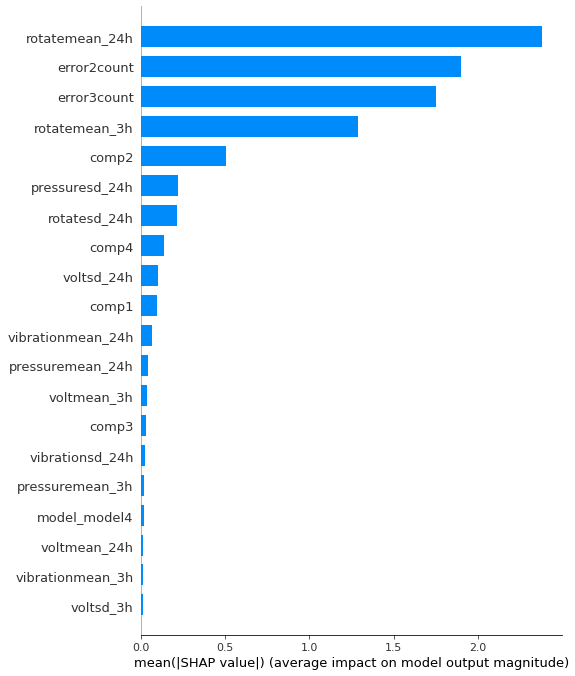

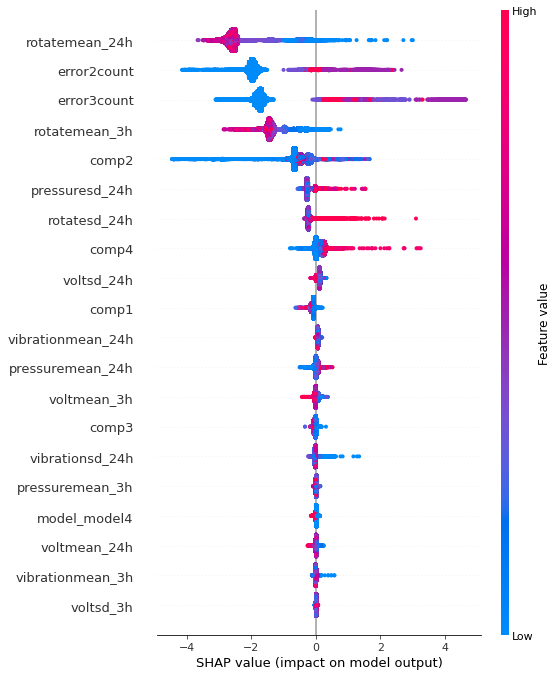

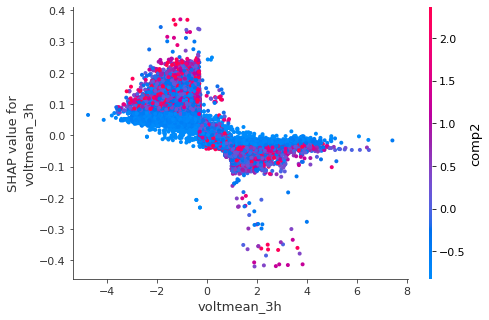

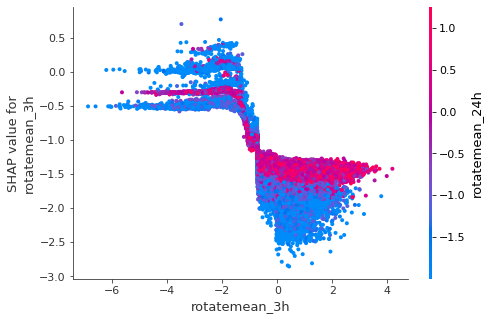

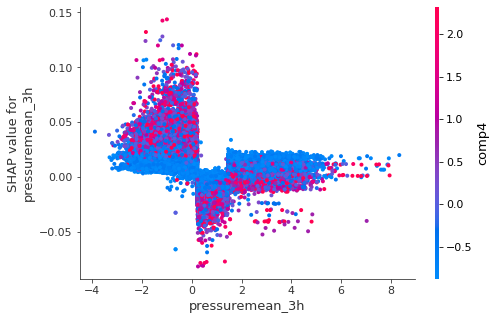

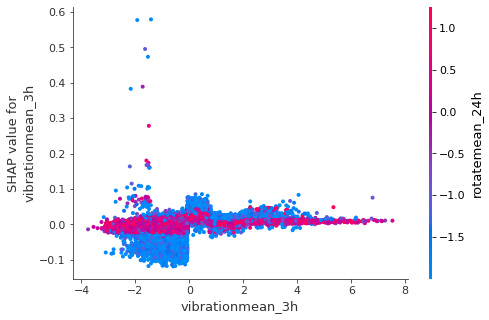

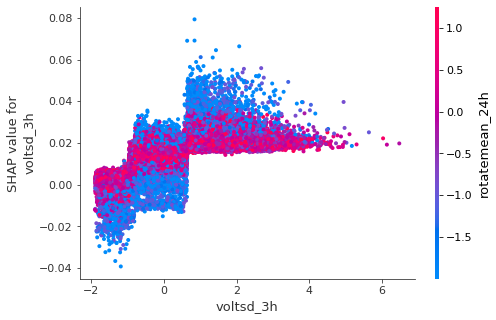

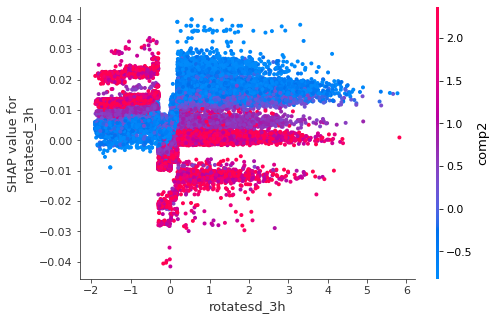

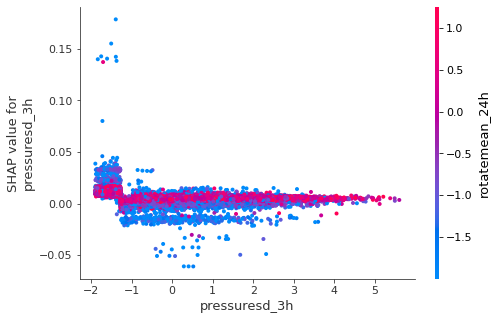

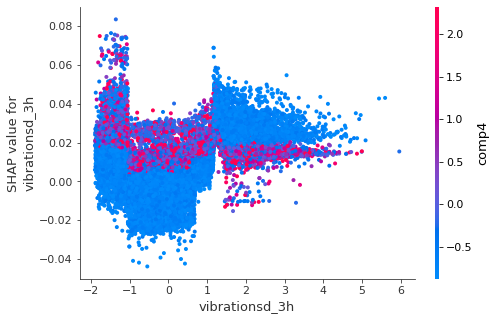

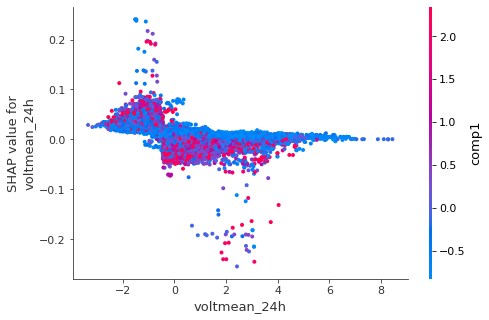

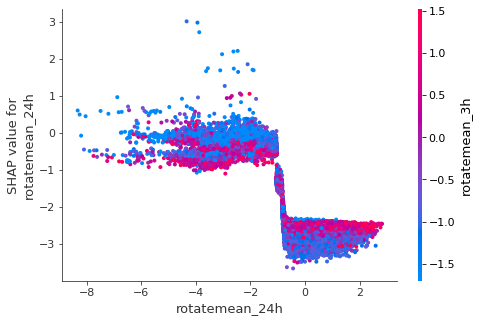

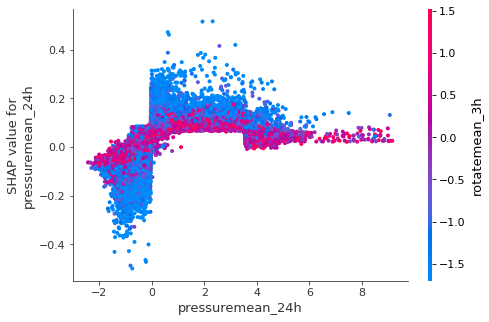

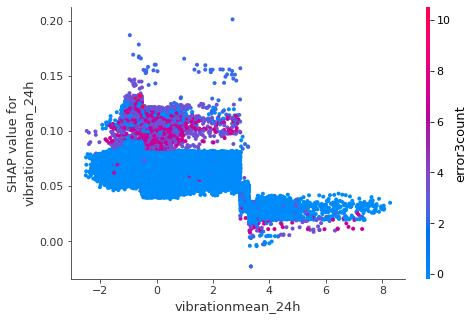

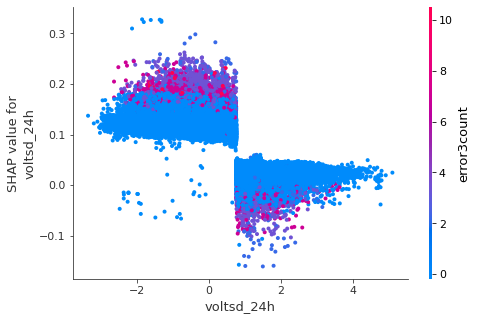

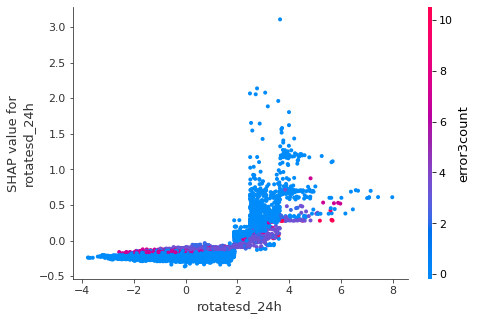

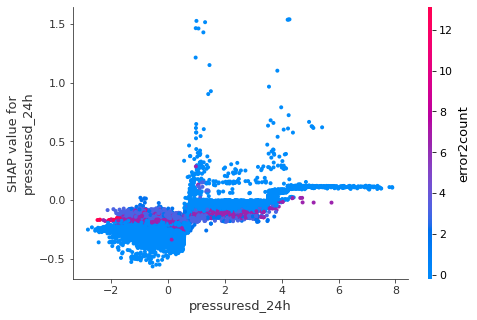

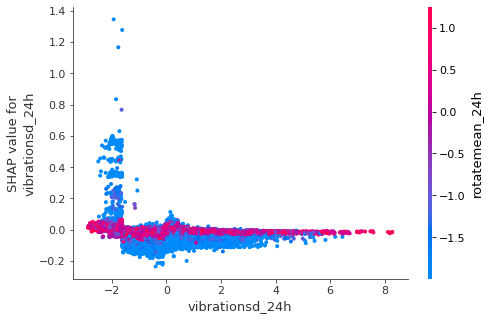

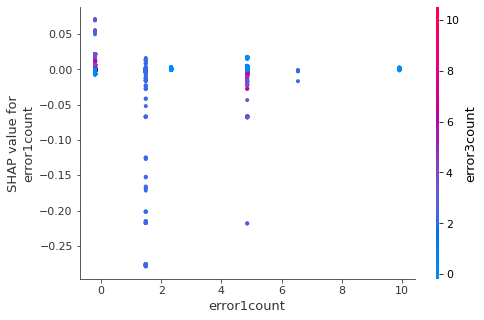

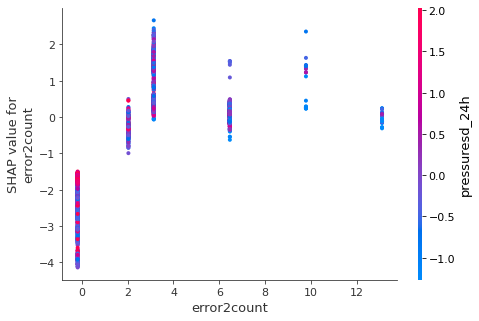

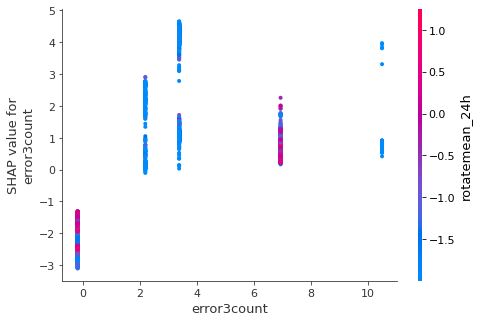

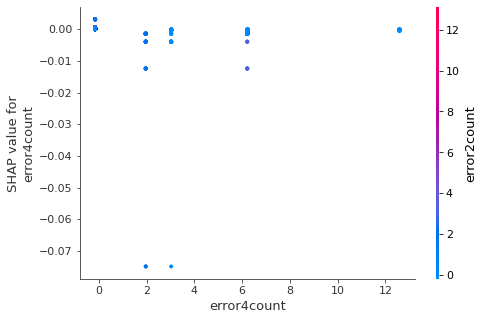

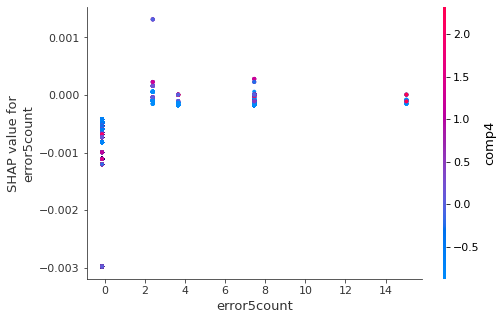

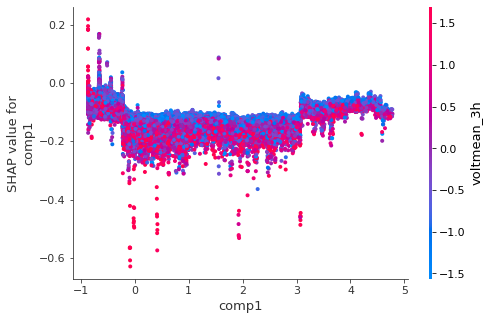

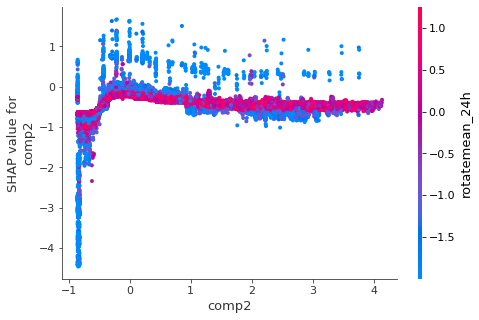

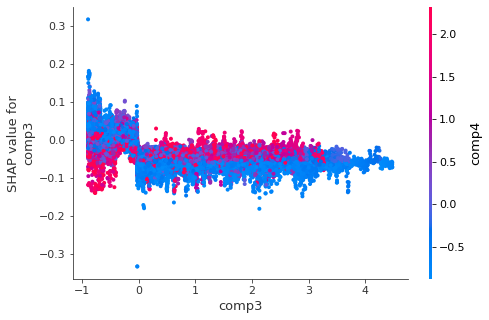

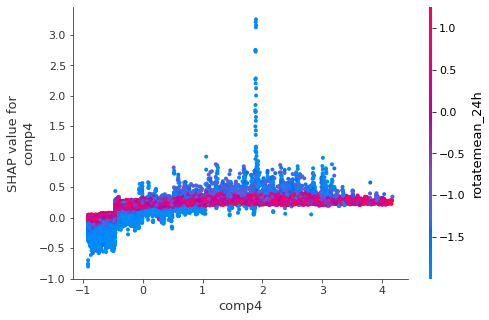

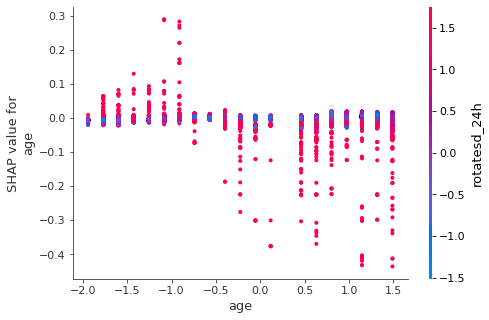

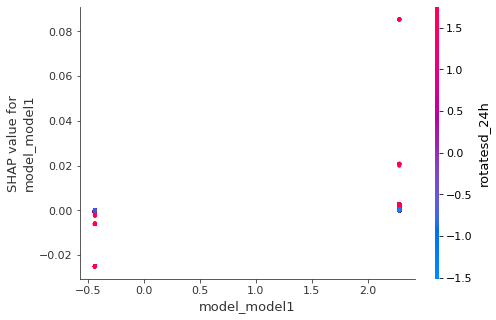

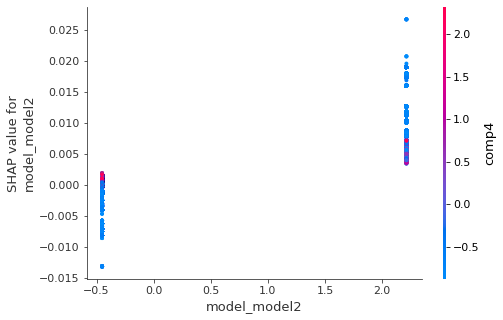

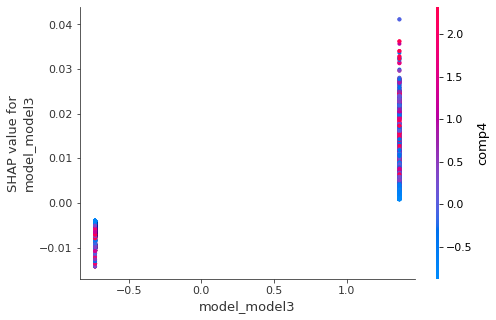

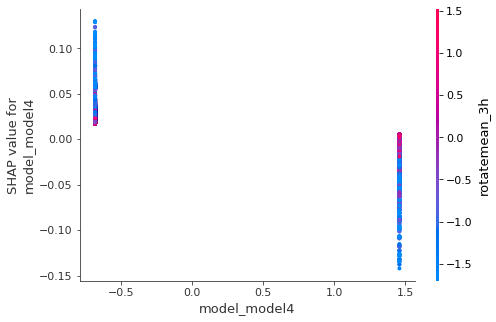

Explaining ANAI Done [ ✓ ]



In [43]:
ai1.explain('shap')

In [44]:
ai1.explain('perm')

Explaining Best ANAI model [*]



Explaining ANAI Done [ ✓ ]



<div style="color:white;
           display:fill;
           border-radius:10px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:#32a6a8;
           color:Black;
           font-family:cursive;
            padding:5px 5px 5px 5px;
           ">
<h2 style="text-align:center;font-weight: bold;">Leaderboards 🥳</h2>



</div>

In [45]:
ai1.result()

Name   Accuracy  Cross Validated Accuracy  \
0            XGBoost Classifier  99.923095                 99.906825   
1           CatBoost Classifier  99.902390                 99.879465   
2      Random Forest Classifier  99.890558                 99.860978   
3  Gradient Boosting Classifier  99.787033                 99.633957   
4           LightGBM Classifier  96.820279                 97.879169   

                                               Model  
0  XGBClassifier(base_score=0.5, booster='gbtree'...  
1  <catboost.core.CatBoostClassifier object at 0x...  
2  (DecisionTreeClassifier(max_features='auto', r...  
3  ([DecisionTreeRegressor(criterion='friedman_ms...  
4                                   LGBMClassifier()

<div style="color:white;
           display:fill;
           border-radius:10px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:#32a6a8;
           color:Black;
           font-family:cursive;
            padding:5px 5px 5px 5px;
           ">
<h1 style="text-align:center;font-weight: bold;">Thanks</h1>
    <h2 style="text-align:center;font-weight: bold;">Please upvote and comment your feedback</h2>


</div>